In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
import datetime, nltk, warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
files = files.upload()

In [ ]:
df = pd.read_csv('dataset.csv',encoding ='unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df.duplicated().sum()

5225

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(401604, 8)

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


From CustomerId we can find Customer, from InvoiceNo we can find transactions and from Invoicedate we can able to find No.of products

In [ ]:
pd.DataFrame([{'Products': len(df['StockCode'].value_counts()),    
               'Transactions': len(df['InvoiceNo'].value_counts()),
               'Customers': len(df['CustomerID'].value_counts()),}], 
             columns = ['Products', 'Transactions', 'Customers'], index = ['quantities'])

,Products,Transactions,Customers
quantities,3684,22190,4372


In [ ]:
products = df.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()

# Rename the InvoiceDate to number of products
n_products = products.rename(columns = {'InvoiceDate':'Number of products'})

# Sort in Ascending order based on CustomerID
n_products[:10].sort_values('CustomerID')

,CustomerID,InvoiceNo,Number of products
0,12346.0,541431,1
1,12346.0,C541433,1
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24
5,12347.0,556201,18
6,12347.0,562032,22
7,12347.0,573511,47
8,12347.0,581180,11
9,12348.0,539318,17


Cancellation of products can be viewed through InvoiceNo

In [ ]:
n_products['Cancelled_Orders'] = n_products['InvoiceNo'].apply(lambda x:int('C' in x)) 
display(n_products[:5])

# total no. of orders cancelled
n1 = n_products['Cancelled_Orders'].sum()

# Sum of rows
n2 = n_products.shape[0]

# Divide by 100 to get the percentage value
print('Number of orders cancelled: {}/{}({:.2f}%) '.format(n1, n2, n1/n2*100))

,CustomerID,InvoiceNo,Number of products,Cancelled_Orders
0,12346.0,541431,1,0
1,12346.0,C541433,1,1
2,12347.0,537626,31,0
3,12347.0,542237,29,0
4,12347.0,549222,24,0


Number of orders cancelled: 3654/22190(16.47%) 


In [ ]:
df['Total_price']=df['Quantity']*df['UnitPrice']
df['Total_price']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: Total_price, Length: 401604, dtype: float64

In [ ]:
df.drop(['InvoiceNo'],axis=1,inplace=True)

In [ ]:
df.shape

(401604, 8)

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID,Total_price
count,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818,20.613638
std,250.283037,69.764035,1714.006089,430.352218
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13939.000000,4.250000
50%,5.000000,1.950000,15145.000000,11.700000
75%,12.000000,3.750000,16784.000000,19.800000
max,80995.000000,38970.000000,18287.000000,168469.600000


Pre-Processing the data

In [ ]:
df['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 401604, dtype: object

In [ ]:
#Replacing Short Words
df['Description_analysed'] = df['Description'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))
df['Description_analysed']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904                  PACK SPACEBOY NAPKINS
541905            CHILDREN'S APRON DOLLY GIRL
541906           CHILDRENS CUTLERY DOLLY GIRL
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908             BAKING SET PIECE RETROSPOT
Name: Description_analysed, Length: 401604, dtype: object

In [ ]:
# make entire text lowercase
df['Description_analysed'] = [Description.lower() for Description in df['Description_analysed']]
df['Description_analysed']

0          white hanging heart t-light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4              red woolly hottie white heart.
                         ...                 
541904                  pack spaceboy napkins
541905            children's apron dolly girl
541906           childrens cutlery dolly girl
541907        childrens cutlery circus parade
541908             baking set piece retrospot
Name: Description_analysed, Length: 401604, dtype: object

In [ ]:
# Removing Stop Words
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')

# Making custom list of words to be removed 
add_words = ['set','tag','red','white','blue','green','orange','black','pink']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    Desc_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in Desc_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['Description_analysed'] = [remove_stopwords(r) for r in df['Description_analysed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['Description_analysed']

0                hanging heart t-light holder
1                               metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4                       woolly hottie heart .
                         ...                 
541904                  pack spaceboy napkins
541905           children 's apron dolly girl
541906           childrens cutlery dolly girl
541907        childrens cutlery circus parade
541908                 baking piece retrospot
Name: Description_analysed, Length: 401604, dtype: object

In [ ]:
# Lemmatization 
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['Description_analysed'] = df['Description_analysed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
df['Description_analysed']

0                hang heart t-light holder
1                            metal lantern
2            cream cupid heart coat hanger
3         knit union flag hot water bottle
4                    woolly hottie heart .
                        ...               
541904                pack spaceboy napkin
541905           child 's apron dolly girl
541906        childrens cutlery dolly girl
541907     childrens cutlery circus parade
541908                bake piece retrospot
Name: Description_analysed, Length: 401604, dtype: object

In [ ]:
df[:5]

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,Description_analysed
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,hang heart t-light holder
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,metal lantern
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,cream cupid heart coat hanger
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,knit union flag hot water bottle
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,woolly hottie heart .


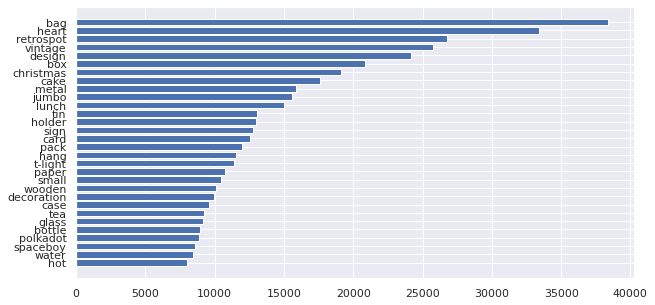

In [ ]:
# plotting most frequent words
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')
from nltk import FreqDist #function to find the frequent words in the data

#Extracts words into list and count frequency
all_words = ' '.join([text for text in df['Description_analysed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(10,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

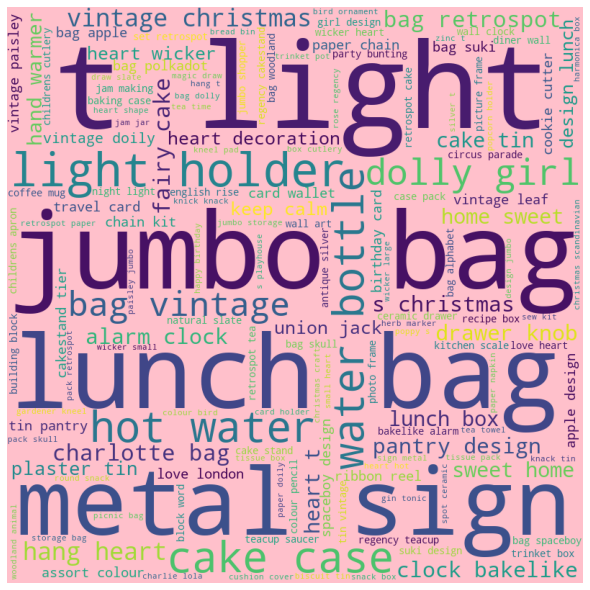

In [ ]:
# Word cloud
from wordcloud import WordCloud

all_words = ' '.join([text for text in df['Description_analysed']])
 
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='pink', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [ ]:
# Bag of words

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=2500)

x = tfidf.fit_transform(df['Description_analysed'])
featureNames = tfidf.get_feature_names()
print(len(featureNames))

1767


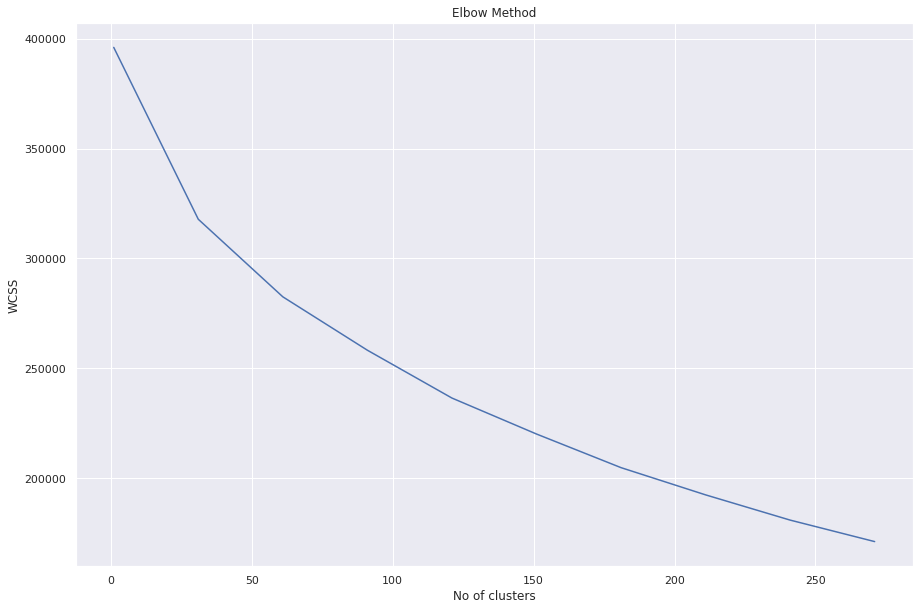

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,300,30):
  kmeans = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0).fit(x)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,10),facecolor=None)
plt.plot(range(1,300,30),wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=40).fit(x)
cluster=kmeans.labels_ 
[c for c in cluster][:20]

[12, 11, 0, 6, 8, 34, 12, 30, 8, 22, 0, 0, 26, 8, 22, 34, 34, 15, 37, 34]

In [ ]:
df['clusters']=cluster

In [ ]:
df[['Description','Description_analysed','clusters']]

,Description,Description_analysed,clusters
0,WHITE HANGING HEART T-LIGHT HOLDER,hang heart t-light holder,12
1,WHITE METAL LANTERN,metal lantern,11
2,CREAM CUPID HEARTS COAT HANGER,cream cupid heart coat hanger,0
3,KNITTED UNION FLAG HOT WATER BOTTLE,knit union flag hot water bottle,6
4,RED WOOLLY HOTTIE WHITE HEART.,woolly hottie heart .,8
...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,pack spaceboy napkin,17
541905,CHILDREN'S APRON DOLLY GIRL,child 's apron dolly girl,16
541906,CHILDRENS CUTLERY DOLLY GIRL,childrens cutlery dolly girl,16
541907,CHILDRENS CUTLERY CIRCUS PARADE,childrens cutlery circus parade,34


In [ ]:
df[:5]

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,Description_analysed,clusters
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,hang heart t-light holder,12
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,metal lantern,11
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,cream cupid heart coat hanger,0
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,knit union flag hot water bottle,6
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,woolly hottie heart .,8


In [ ]:
df[df['clusters']==1].head(5)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,Description_analysed,clusters
93,20725,LUNCH BAG RED RETROSPOT,10,2010-12-01 09:37:00,1.65,14688.0,United Kingdom,16.50,lunch bag retrospot,1
368,20725,LUNCH BAG RED RETROSPOT,1,2010-12-01 11:21:00,1.65,15862.0,United Kingdom,1.65,lunch bag retrospot,1
369,22382,LUNCH BAG SPACEBOY DESIGN,2,2010-12-01 11:21:00,1.65,15862.0,United Kingdom,3.30,lunch bag spaceboy design,1
370,20726,LUNCH BAG WOODLAND,1,2010-12-01 11:21:00,1.65,15862.0,United Kingdom,1.65,lunch bag woodland,1
371,22384,LUNCH BAG PINK POLKADOT,1,2010-12-01 11:21:00,1.65,15862.0,United Kingdom,1.65,lunch bag polkadot,1


In [ ]:
len(df['clusters']==1)

401604

In [ ]:
df[df['clusters']==2].head(5)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,Description_analysed,clusters
128,84832,ZINC WILLIE WINKIE CANDLE STICK,1,2010-12-01 09:41:00,0.85,15311.0,United Kingdom,0.85,zinc willie winkie candle stick,2
347,21122,SET/10 PINK POLKADOT PARTY CANDLES,1,2010-12-01 11:21:00,1.25,15862.0,United Kingdom,1.25,set/10 polkadot party candle,2
373,84625C,BLUE NEW BAROQUE CANDLESTICK CANDLE,3,2010-12-01 11:21:00,2.95,15862.0,United Kingdom,8.85,new baroque candlestick candle,2
374,84625A,PINK NEW BAROQUECANDLESTICK CANDLE,3,2010-12-01 11:21:00,2.95,15862.0,United Kingdom,8.85,new baroquecandlestick candle,2
394,21125,SET 6 FOOTBALL CELEBRATION CANDLES,12,2010-12-01 11:29:00,1.25,16218.0,United Kingdom,15.00,football celebration candle,2


In [ ]:
len(df['clusters']==2)

401604

One-hot encoding for clusters column

In [ ]:
cluster_df= df[['CustomerID','clusters']]
pd.get_dummies(cluster_df["clusters"])
dummy_clusters= pd.get_dummies(cluster_df, columns = ['clusters']).astype(int)
dummy_clusters=dummy_clusters.groupby("CustomerID").agg("sum")
dummy_clusters=dummy_clusters.reset_index()

In [ ]:
dummy_clusters

,CustomerID,clusters_0,clusters_1,clusters_2,clusters_3,clusters_4,clusters_5,clusters_6,clusters_7,clusters_8,...,clusters_30,clusters_31,clusters_32,clusters_33,clusters_34,clusters_35,clusters_36,clusters_37,clusters_38,clusters_39
0,12346,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12347,4,0,4,1,0,2,1,18,48,...,0,6,0,5,6,1,14,2,0,0
2,12348,0,0,0,0,0,0,0,0,12,...,0,0,0,0,0,0,9,0,0,0
3,12349,3,0,0,1,0,6,0,1,15,...,0,0,0,7,4,0,2,4,0,3
4,12350,0,0,0,0,0,0,0,0,8,...,2,0,0,1,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280,1,0,0,0,0,0,0,0,2,...,2,0,0,1,0,0,0,0,0,0
4368,18281,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4369,18282,3,0,0,0,0,0,0,4,1,...,0,0,1,0,0,0,0,0,0,0
4370,18283,27,114,2,3,15,13,0,0,77,...,0,0,24,10,12,24,48,2,3,5


In [ ]:
dummy_clusters.shape

(4372, 41)

Grouping Countries

In [ ]:
# group the CustomerId and Country column in the following order and take count
countries = df[['CustomerID','Country']].groupby(['CustomerID','Country']).count()
countries

,
CustomerID,Country
12346.0,United Kingdom
12347.0,Iceland
12348.0,Finland
12349.0,Italy
12350.0,Norway
...,...
18280.0,United Kingdom
18281.0,United Kingdom
18282.0,United Kingdom


In [ ]:
# Take count of the number of unique countries
unique_country = df['Country'].value_counts()
unique_country

United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [ ]:
unique_country.index

Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain', 'Netherlands',
       'Belgium', 'Switzerland', 'Portugal', 'Australia', 'Norway', 'Italy',
       'Channel Islands', 'Finland', 'Cyprus', 'Sweden', 'Austria', 'Denmark',
       'Japan', 'Poland', 'USA', 'Israel', 'Unspecified', 'Singapore',
       'Iceland', 'Canada', 'Greece', 'Malta', 'United Arab Emirates',
       'European Community', 'RSA', 'Lebanon', 'Lithuania', 'Brazil',
       'Czech Republic', 'Bahrain', 'Saudi Arabia'],
      dtype='object')

In [ ]:
len(unique_country)

37

One-hot encoding for country

In [ ]:
cluster_df= df[['CustomerID','Country']]
pd.get_dummies(cluster_df["Country"])
dummy_country= pd.get_dummies(cluster_df, columns = ['Country']).astype(int)
dummy_country=dummy_country.groupby("CustomerID").agg("sum")
dummy_country=dummy_country.reset_index()

In [ ]:
dummy_country

,CustomerID,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,Country_Channel Islands,Country_Cyprus,Country_Czech Republic,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,12346,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
1,12347,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12348,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12349,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12350,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,0
4368,18281,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,0
4369,18282,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,13,0
4370,18283,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,721,0


In [ ]:
dummy_country.shape

(4372, 38)

In [ ]:
#merging clusters & countries
df_1 = dummy_clusters.merge(dummy_country, how = "right")
df_1

,CustomerID,clusters_0,clusters_1,clusters_2,clusters_3,clusters_4,clusters_5,clusters_6,clusters_7,clusters_8,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,12346,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
1,12347,4,0,4,1,0,2,1,18,48,...,0,0,0,0,0,0,0,0,0,0
2,12348,0,0,0,0,0,0,0,0,12,...,0,0,0,0,0,0,0,0,0,0
3,12349,3,0,0,1,0,6,0,1,15,...,0,0,0,0,0,0,0,0,0,0
4,12350,0,0,0,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280,1,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,10,0
4368,18281,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7,0
4369,18282,3,0,0,0,0,0,0,4,1,...,0,0,0,0,0,0,0,0,13,0
4370,18283,27,114,2,3,15,13,0,0,77,...,0,0,0,0,0,0,0,0,721,0


In [ ]:
df_1.shape

(4372, 78)

In [ ]:
df_1=df_1.dropna()
df_2=df_1.copy()
df_2.drop("CustomerID",axis=1,inplace=True)
X=df_2

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.32642128, -0.27432873, -0.29775228, ..., -0.02124653,
        -0.38308827, -0.02470078],
       [-0.0573449 , -0.27432873,  0.4825702 , ..., -0.02124653,
        -0.39271436, -0.02470078],
       [-0.32642128, -0.27432873, -0.29775228, ..., -0.02124653,
        -0.39271436, -0.02470078],
       ...,
       [-0.124614  , -0.27432873, -0.29775228, ..., -0.02124653,
        -0.3301448 , -0.02470078],
       [ 1.48984428, 12.18717613,  0.09240896, ..., -0.02124653,
         3.07748959, -0.02470078],
       [ 0.07719329, -0.27432873,  1.26289269, ..., -0.02124653,
        -0.05580135, -0.02470078]])

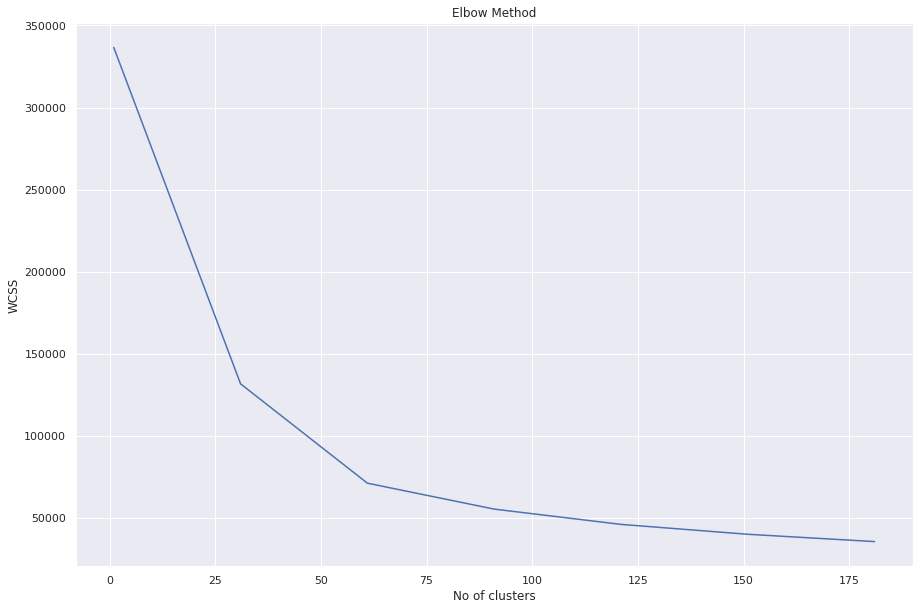

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,200,30):
  kmeans = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0).fit(X)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,10),facecolor=None)
plt.plot(range(1,200,30),wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=55).fit(X)
cluster_1=kmeans.labels_ 
[c for c in cluster_1][:20]

[0, 23, 0, 29, 0, 50, 0, 0, 14, 0, 49, 0, 32, 39, 0, 53, 0, 53, 0, 0]

In [ ]:
df_1['final_clusters']=cluster_1
df_1

,CustomerID,clusters_0,clusters_1,clusters_2,clusters_3,clusters_4,clusters_5,clusters_6,clusters_7,clusters_8,...,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,final_clusters
0,12346,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1,12347,4,0,4,1,0,2,1,18,48,...,0,0,0,0,0,0,0,0,0,23
2,12348,0,0,0,0,0,0,0,0,12,...,0,0,0,0,0,0,0,0,0,0
3,12349,3,0,0,1,0,6,0,1,15,...,0,0,0,0,0,0,0,0,0,29
4,12350,0,0,0,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280,1,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,10,0,0
4368,18281,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,7,0,0
4369,18282,3,0,0,0,0,0,0,4,1,...,0,0,0,0,0,0,0,13,0,0
4370,18283,27,114,2,3,15,13,0,0,77,...,0,0,0,0,0,0,0,721,0,44


In [ ]:
final_c=df_1[["CustomerID","final_clusters"]]
final_c

,CustomerID,final_clusters
0,12346,0
1,12347,23
2,12348,0
3,12349,29
4,12350,0
...,...,...
4367,18280,0
4368,18281,0
4369,18282,0
4370,18283,44


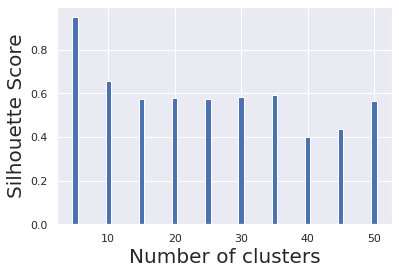

In [ ]:
#to check whether the clusters fit perfect to its cluster groups
from sklearn.metrics import silhouette_score

silhouette_scores = [] 

for n_cluster in range(2, 12):
    silhouette_scores.append( 
        silhouette_score(X, KMeans(n_clusters = n_cluster).fit_predict(X))) 
    
# Plotting a bar graph to compare the results 
k = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('Silhouette Score', fontsize = 20) 
plt.show() 

In [ ]:
df_1.shape

(4372, 79)

In [ ]:
df_1.columns

Index(['CustomerID', 'clusters_0', 'clusters_1', 'clusters_2', 'clusters_3',
       'clusters_4', 'clusters_5', 'clusters_6', 'clusters_7', 'clusters_8',
       'clusters_9', 'clusters_10', 'clusters_11', 'clusters_12',
       'clusters_13', 'clusters_14', 'clusters_15', 'clusters_16',
       'clusters_17', 'clusters_18', 'clusters_19', 'clusters_20',
       'clusters_21', 'clusters_22', 'clusters_23', 'clusters_24',
       'clusters_25', 'clusters_26', 'clusters_27', 'clusters_28',
       'clusters_29', 'clusters_30', 'clusters_31', 'clusters_32',
       'clusters_33', 'clusters_34', 'clusters_35', 'clusters_36',
       'clusters_37', 'clusters_38', 'clusters_39', 'Country_Australia',
       'Country_Austria', 'Country_Bahrain', 'Country_Belgium',
       'Country_Brazil', 'Country_Canada', 'Country_Channel Islands',
       'Country_Cyprus', 'Country_Czech Republic', 'Country_Denmark',
       'Country_EIRE', 'Country_European Community', 'Country_Finland',
       'Country_France', 'Cou

In [ ]:
x=df_1
y=final_c.drop(['CustomerID'],axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state=0)

In [ ]:
x_train.shape, y_train.shape

In [ ]:
x_test.shape, y_test.shape